Risultati della simulazione (con rumore): {'1': 481, '0': 543}
Varianza delle misurazioni: 0.0971379


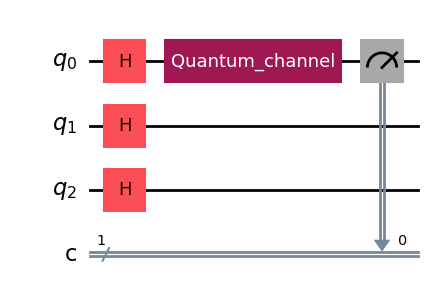

In [95]:
import qiskit
from qiskit import QuantumCircuit
from qiskit_aer import AerSimulator
from qiskit_aer.noise import (NoiseModel, amplitude_damping_error, depolarizing_error)
import numpy as np
from qiskit import transpile

# Definire il circuito quantistico
def create_circuit():
    qc = QuantumCircuit(3, 1)  # 3 qubit, 1 bit classico
    qc.h(0)
    qc.h(1)
    qc.h(2)
    
    # Aggiungi il gate di rumore depolarizzante come un gate "extra" sul primo qubit (opzionale, può essere applicato ad altri qubit)
    depol_error = depolarizing_error(0.1, 1)  # Probabilità 0.1 per l'errore depolarizzante
    qc.append(depol_error, [0])  # Applica il gate di rumore al primo qubit
    
    qc.measure(0, 0)  # Misurazione
    return qc

# Creare un modello di rumore con amplitude damping (rumore non unital)
def create_noise_model(p_amplitude, p_depolarizing):
    noise_model = NoiseModel()
    
    # Amplitude Damping Error (non unital)
    amplitude_error = amplitude_damping_error(p_amplitude)
    noise_model.add_quantum_error(amplitude_error, ['h'], [0])  # Applicare il rumore alla porta Hadamard
    
    # Depolarizing Error (aggiuntivo, unital)
    depolarizing_error_instance = depolarizing_error(p_depolarizing, 1)
    noise_model.add_all_qubit_quantum_error(depolarizing_error_instance, ['measure'])  # Misura rumorosa
    
    return noise_model

# Simulazione con rumore
def simulate_circuit(qc, noise_model, shots=1024):
    simulator = AerSimulator(noise_model=noise_model)  # Simulatore Aer con rumore
    result = simulator.run(qc, shots=shots).result()  # Run the circuit directly without transpiling
    counts = result.get_counts()
    return counts

# Calcolo della varianza delle misurazioni
def calculate_variance(counts, shots):
    p0 = counts.get('0', 0) / shots
    p1 = counts.get('1', 0) / shots
    variance = p0 * (1 - p0) + p1 * (1 - p1)  # Varianza binomiale
    return variance

# Parametri
p_amplitude = 0.1  # Probabilità di damping
p_depolarizing = 0.1  # Probabilità di errore depolarizzante
shots = 10000

# Creazione del circuito e modello di rumore
qc = create_circuit()
noise_model = create_noise_model(p_amplitude, p_depolarizing)

# Simulazione
counts = simulate_circuit(qc, noise_model)
variance = calculate_variance(counts, shots)

# Risultati
print("Risultati della simulazione (con rumore):", counts)
print("Varianza delle misurazioni:", variance)

# Disegnare il circuito
qc.draw('mpl')
